# 🚢 "TITANIC SURVIVAL PREDICTION: DATA ANALYSIS & MACHINE LEARNING"


In [1]:
# Data handling and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer



### 🔍 **1.INITIAL DATA LOADING AND INSPECTION**

In [2]:
# Load the dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Initial inspection
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

print("\nData types and missing values:")
print(df.info())

print("\nSummary statistics:")
display(df.describe())

Dataset shape: (891, 12)

First 5 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Summary statistics:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 2.DATA CLEANING AND FEATURE ENGINEERING

In [3]:
# Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna('S')  # Fill with most common port

# Create new features
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# Convert categorical variables
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # Male=0, Female=1
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])  # C=0, Q=1, S=2

# Drop unnecessary columns
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Verify cleaning
print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
IsAlone       0
dtype: int64


# 3.DATA VISUALIZATION AND SURVIVAL ANALYSIS

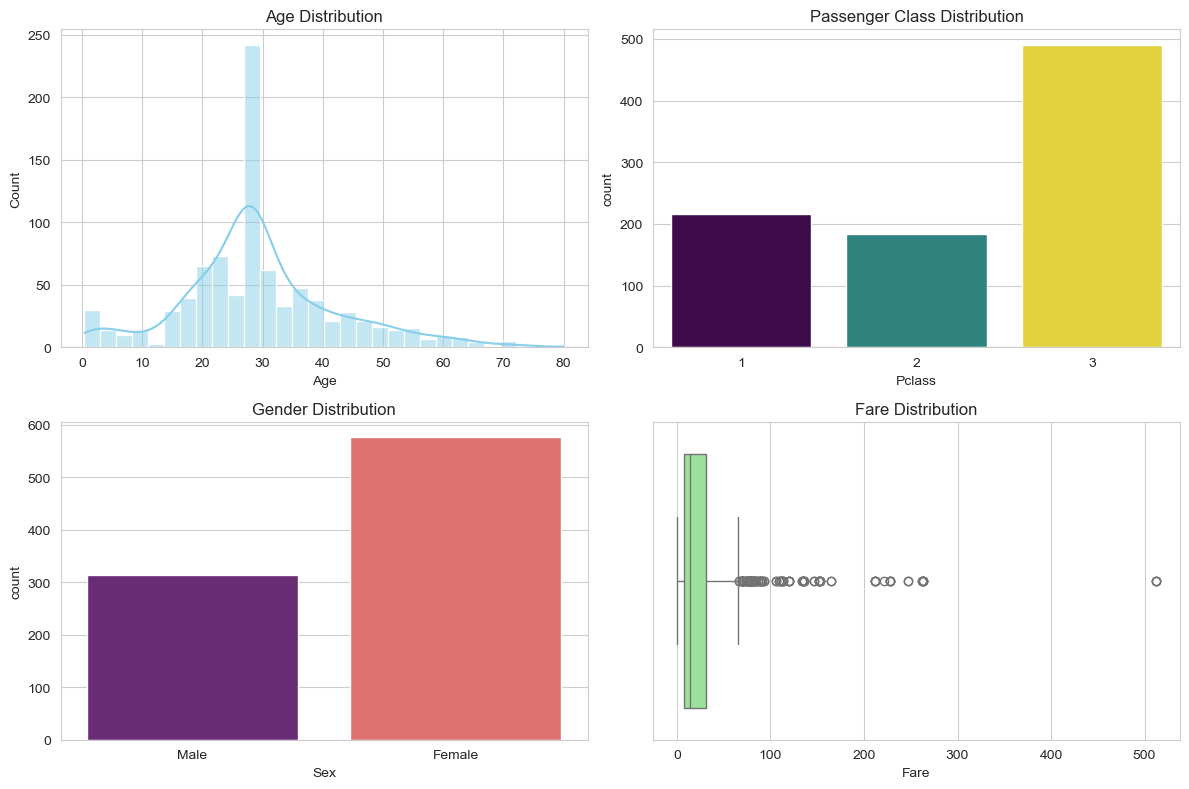

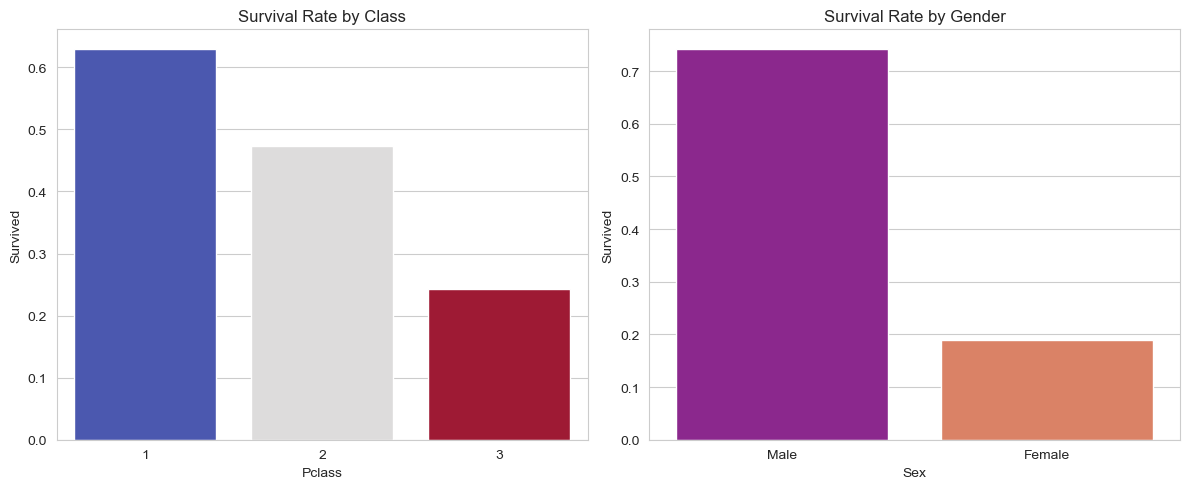

In [4]:
# Set style for plots
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

# Age distribution
plt.subplot(2, 2, 1)
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')

# Passenger class distribution - FIXED
plt.subplot(2, 2, 2)
sns.countplot(x='Pclass', data=df, hue='Pclass', palette='viridis', legend=False)
plt.title('Passenger Class Distribution')

# Gender distribution - FIXED
plt.subplot(2, 2, 3)
sns.countplot(x='Sex', data=df, hue='Sex', palette='magma', legend=False)
plt.xticks([0, 1], ['Male', 'Female'])
plt.title('Gender Distribution')

# Fare distribution
plt.subplot(2, 2, 4)
sns.boxplot(x='Fare', data=df, color='lightgreen')
plt.title('Fare Distribution')

plt.tight_layout()
plt.show()

# Survival analysis
plt.figure(figsize=(12, 5))

# Survival by class - FIXED
plt.subplot(1, 2, 1)
sns.barplot(x='Pclass', y='Survived', data=df, errorbar=None, hue='Pclass', palette='coolwarm', legend=False)
plt.title('Survival Rate by Class')

# Survival by gender - FIXED
plt.subplot(1, 2, 2)
sns.barplot(x='Sex', y='Survived', data=df, errorbar=None, hue='Sex', palette='plasma', legend=False)
plt.xticks([0, 1], ['Male', 'Female'])
plt.title('Survival Rate by Gender')

plt.tight_layout()
plt.show()

# 4.TRAIN-TEST SPLIT FOR MODELING

In [5]:
# Separate features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 712
Test set size: 179


### 5.RANDOM FOREST MODEL PIPELINE AND TRAINING

In [6]:
# Create a pipeline with preprocessing and model
model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(
        n_estimators=100,
        max_depth=5,
        random_state=42
    )
)

# Train the model
model.fit(X_train, y_train)
print("Model training complete!")

Model training complete!


# 6.MODEL EVALUATION AND FEATURE IMPORTANCE VISUALIZATION


Model Accuracy: 79.89%


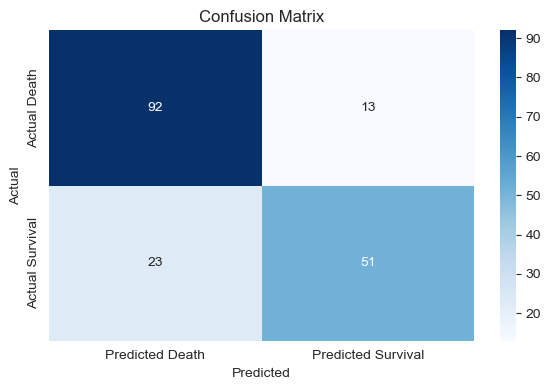

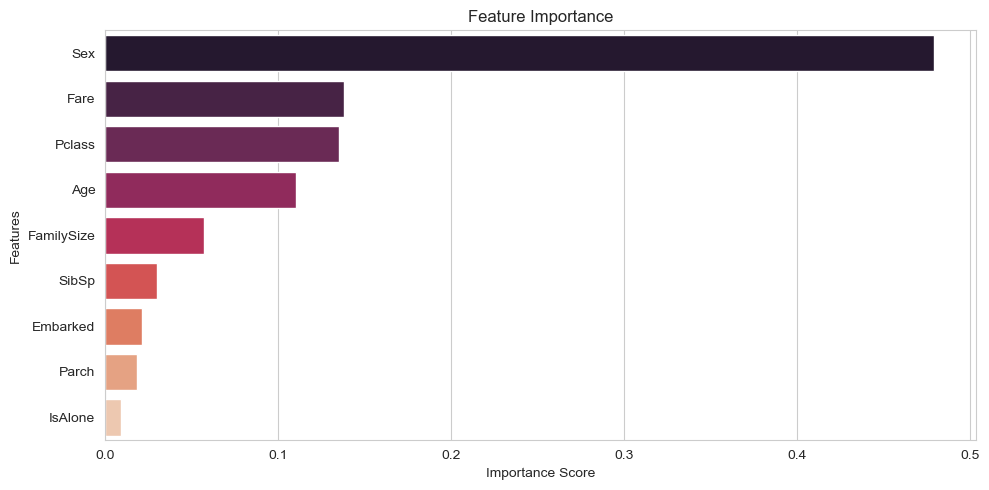

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2%}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Death', 'Predicted Survival'],
            yticklabels=['Actual Death', 'Actual Survival'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Feature importance
feature_imp = pd.Series(
    model.named_steps['randomforestclassifier'].feature_importances_,
    index=X.columns
).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(
    x=feature_imp.values,
    y=feature_imp.index,
    hue=feature_imp.index,
    palette='rocket',
    dodge=False,
    legend=False
)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


# 7.MODEL SAVING

In [8]:
import joblib

# Save the trained model
joblib.dump(model, 'titanic_survival_model.pkl')
print("Model saved as 'titanic_survival_model.pkl'")

Model saved as 'titanic_survival_model.pkl'


# 8.SURVIVAL RATE BY PASSENGER CLASS

Survival Rate by Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


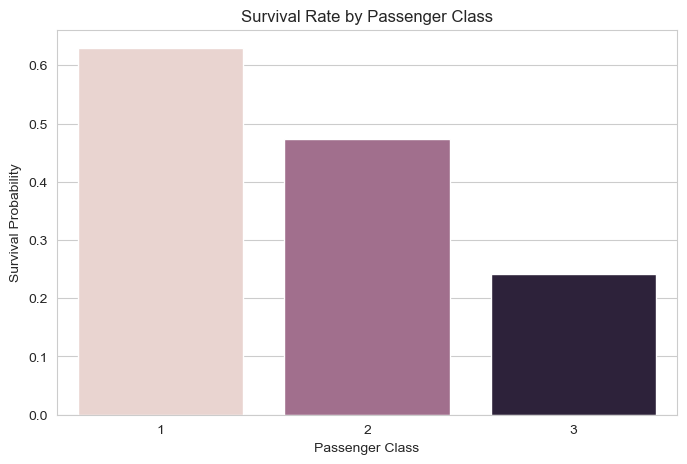

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset from the URL
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Survival rate by passenger class
class_survival = df.groupby('Pclass')['Survived'].mean()
print("Survival Rate by Class:")
print(class_survival.sort_values(ascending=False))

# Visualization
plt.figure(figsize=(8,5))
sns.barplot(x=class_survival.index, y=class_survival.values, hue=class_survival.index, legend=False)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Probability')
plt.xlabel('Passenger Class')
plt.show()


# 9.SURVIVAL ANALYSIS BY GENDER AND AGE GROUP


Survival Rates by Gender and Age Group:
AgeGroup     Child     Adult   Elderly
Sex                                   
0         0.431373  0.167653  0.105263
1         0.673469  0.751908  1.000000


<Figure size 1000x600 with 0 Axes>

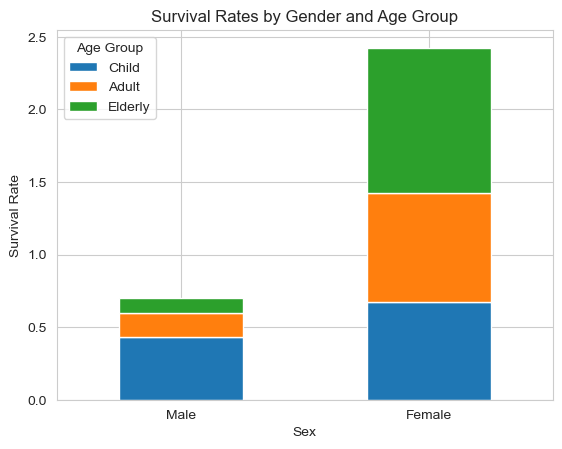

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Preprocessing
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Age'] = df['Age'].fillna(df['Age'].median())

# Create age groups
df['AgeGroup'] = pd.cut(df['Age'], 
                       bins=[0, 16, 60, 100],
                       labels=['Child', 'Adult', 'Elderly'])

# Survival by gender and age - with observed=True to silence warning
policy_check = df.groupby(['Sex', 'AgeGroup'], observed=True)['Survived'].mean().unstack()
print("\nSurvival Rates by Gender and Age Group:")
print(policy_check)

# Visualization
plt.figure(figsize=(10, 6))
policy_check.plot(kind='bar', stacked=True)
plt.title('Survival Rates by Gender and Age Group')
plt.ylabel('Survival Rate')
plt.xticks([0, 1], ['Male', 'Female'], rotation=0)
plt.legend(title='Age Group')
plt.show()

# 10.EXPLORATORY DATA ANALYSIS - FEATURE DISTRIBUTIONS

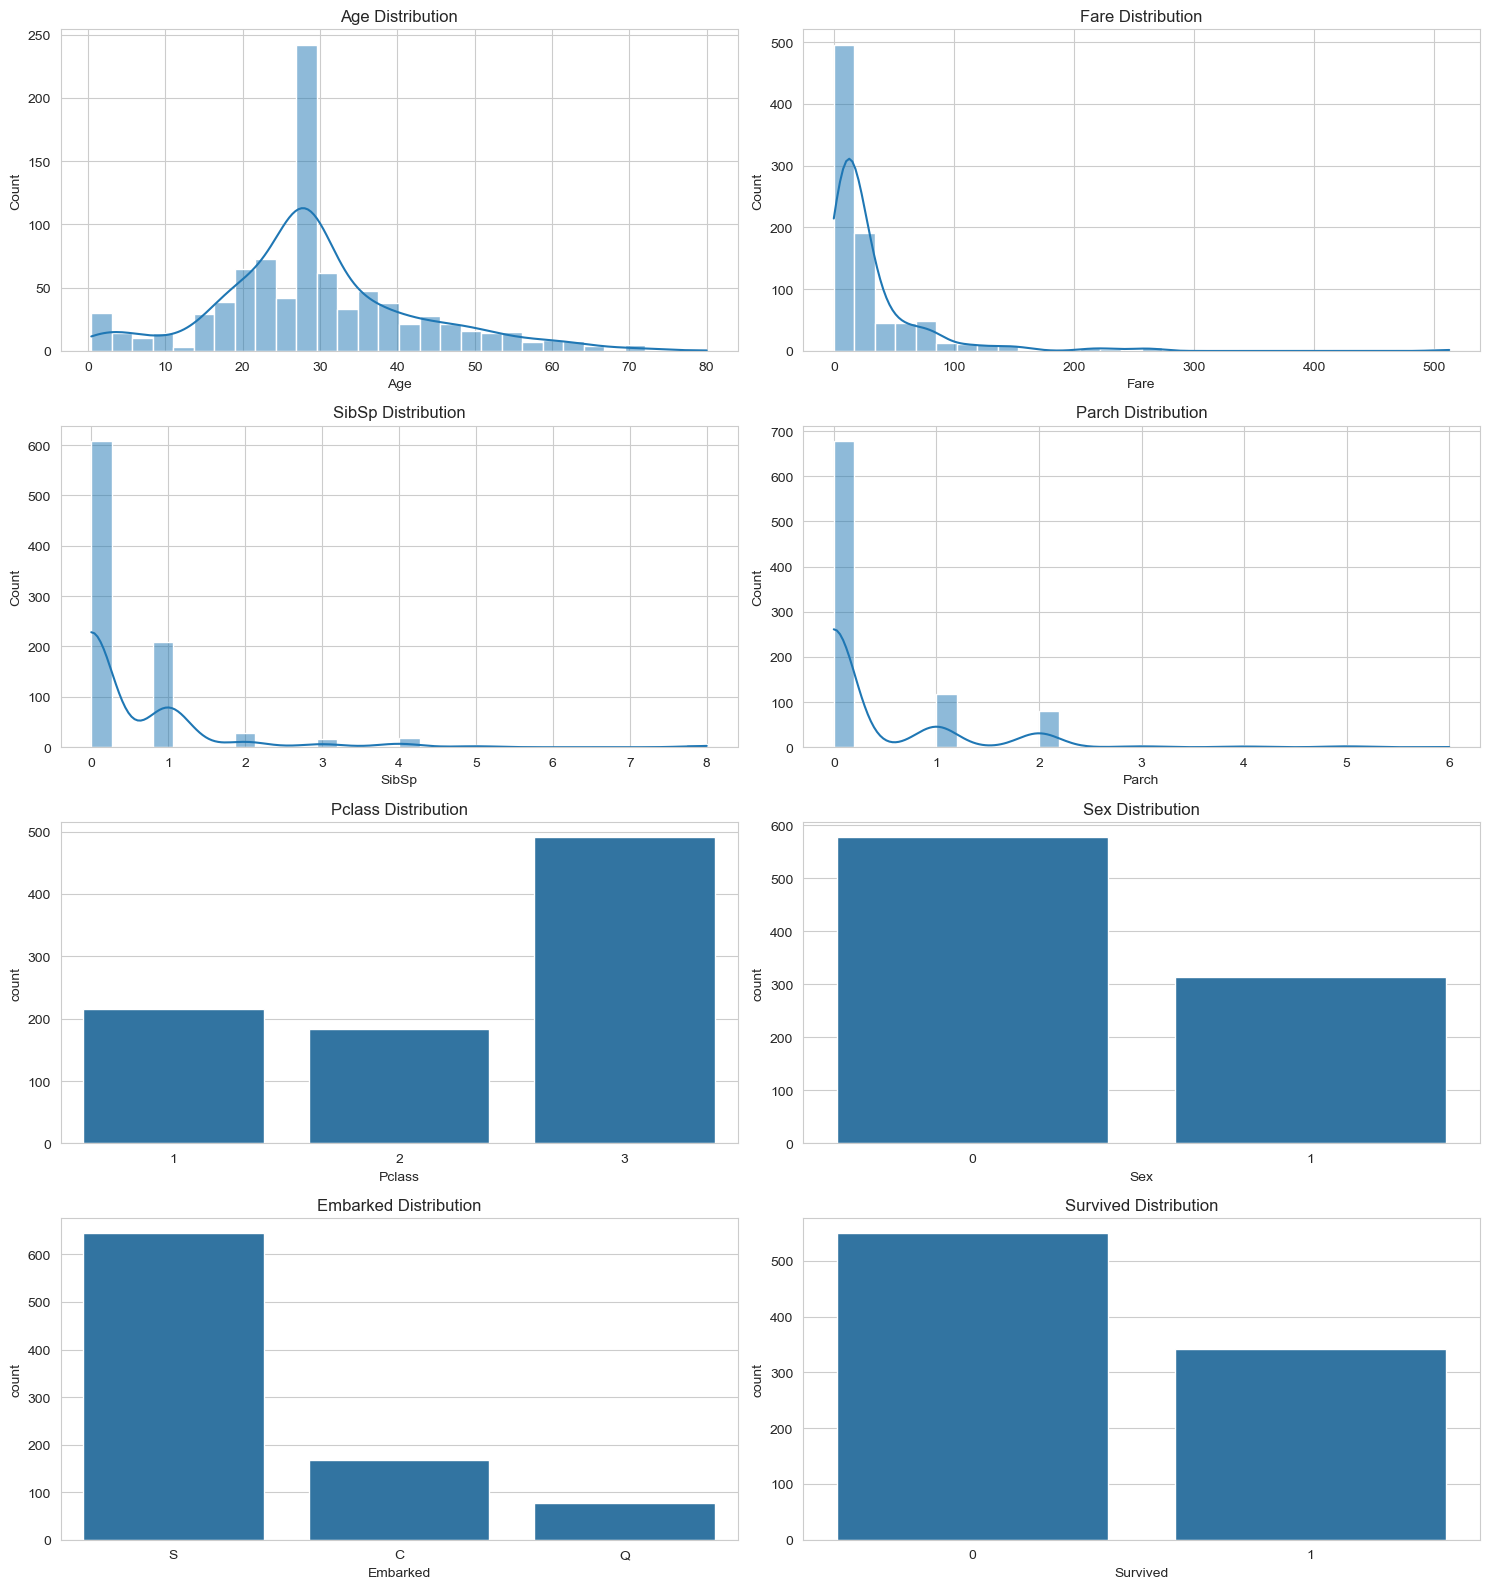

In [11]:
plt.figure(figsize=(15, 16))  # Increase height for better spacing

# 1. Numerical Features Distribution
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'{feature} Distribution')

# 2. Categorical Features Distribution
categorical_features = ['Pclass', 'Sex', 'Embarked', 'Survived']
for i, feature in enumerate(categorical_features, 5):
    plt.subplot(4, 2, i)
    sns.countplot(x=feature, data=df)
    plt.title(f'{feature} Distribution')

plt.tight_layout()
plt.show()


# 11.FEATURE CORRELATION AND CROSS-TAB ANALYSIS

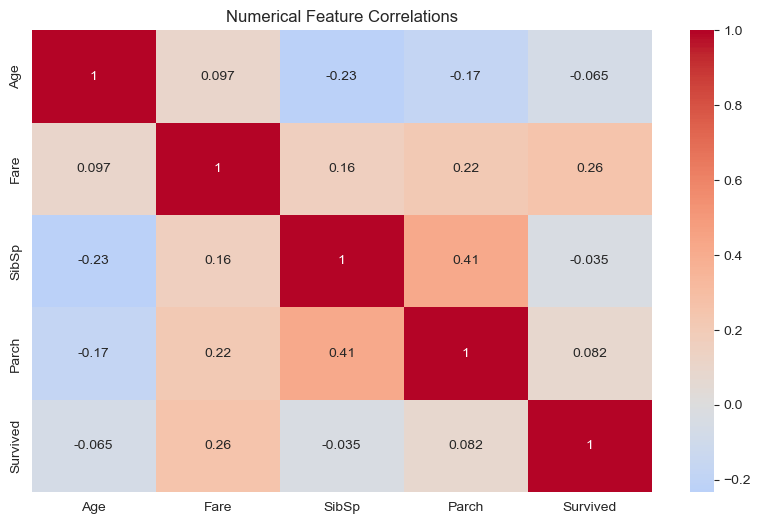


=== CROSS-FEATURE RELATIONSHIPS ===

Pclass vs Fare:


Fare,0.0000,4.0125,5.0000,6.2375,6.4375,6.4500,6.4958,6.7500,6.8583,6.9500,...,153.4625,164.8667,211.3375,211.5000,221.7792,227.5250,247.5208,262.3750,263.0000,512.3292
Pclass,,,,,,,,,,,,,,,,,,,,,
1,0.023148,0.000000,0.00463,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.013889,0.009259,0.013889,0.00463,0.00463,0.018519,0.009259,0.009259,0.018519,0.013889
2,0.032609,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.008147,0.002037,0.00000,0.002037,0.002037,0.002037,0.004073,0.004073,0.002037,0.002037,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000



Sex vs Survived:


Survived,0,1
Sex,,
0,0.811092,0.188908
1,0.257962,0.742038



Embarked vs Pclass:


Pclass,1,2,3
Embarked,,,
C,0.505952,0.101190,0.392857
Q,0.025974,0.038961,0.935065
S,0.197205,0.254658,0.548137


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix for numerical features
numerical = ['Age', 'Fare', 'SibSp', 'Parch', 'Survived']
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical].corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Numerical Feature Correlations")
plt.show()

# Cross-feature relationships
print("\n=== CROSS-FEATURE RELATIONSHIPS ===")
relationships = [
    ('Pclass', 'Fare'),
    ('Sex', 'Survived'),
    ('Embarked', 'Pclass')
]

for rel in relationships:
    print(f"\n{rel[0]} vs {rel[1]}:")
    display(pd.crosstab(df[rel[0]], df[rel[1]], normalize='index'))

# 12.DATA QUALITY ASSESSMENT 

In [13]:
print("\n=== DATA QUALITY ISSUES ===")
quality_issues = {
    'Missing Cabin Data': f"{df['Cabin'].isnull().mean():.1%} missing",
    'Age Missing': f"{df['Age'].isnull().mean():.1%} missing",
    'Zero Fare Tickets': f"{(df['Fare'] == 0).sum()} instances",
    'Duplicate Tickets': f"{df['Ticket'].duplicated().sum()} duplicates"
}

for issue, desc in quality_issues.items():
    print(f"{issue}: {desc}")


=== DATA QUALITY ISSUES ===
Missing Cabin Data: 77.1% missing
Age Missing: 0.0% missing
Zero Fare Tickets: 15 instances
Duplicate Tickets: 210 duplicates


# 13.STRUCTURAL ANOMALY DETECTION

In [14]:
import pandas as pd

# Load the dataset (if not already loaded)
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Create FamilySize column
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Identify structural anomalies
anomalies = {
    'Age Outliers': df[(df['Age'] < 1) | (df['Age'] > 70)][['Name', 'Age', 'Sex', 'Pclass']],
    'Fare Outliers': df[df['Fare'] > 200][['Name', 'Fare', 'Pclass', 'Embarked']],
    'Large Families': df[df['FamilySize'] > 4][['Name', 'FamilySize', 'Ticket']]
}

print("\n=== STRUCTURAL ANOMALIES ===")
for name, anomaly_df in anomalies.items():
    print(f"\n{name} ({len(anomaly_df)} cases):")
    print(anomaly_df.head(3))  # Use print instead of display if not in a Jupyter notebook



=== STRUCTURAL ANOMALIES ===

Age Outliers (12 cases):
                              Name    Age   Sex  Pclass
78   Caldwell, Master. Alden Gates   0.83  male       2
96       Goldschmidt, Mr. George B  71.00  male       1
116           Connors, Mr. Patrick  70.50  male       3

Fare Outliers (20 cases):
                               Name      Fare  Pclass Embarked
27   Fortune, Mr. Charles Alexander  263.0000       1        S
88       Fortune, Miss. Mabel Helen  263.0000       1        S
118        Baxter, Mr. Quigg Edmond  247.5208       1        C

Large Families (62 cases):
                              Name  FamilySize  Ticket
7   Palsson, Master. Gosta Leonard           5  349909
13     Andersson, Mr. Anders Johan           7  347082
16            Rice, Master. Eugene           6  382652


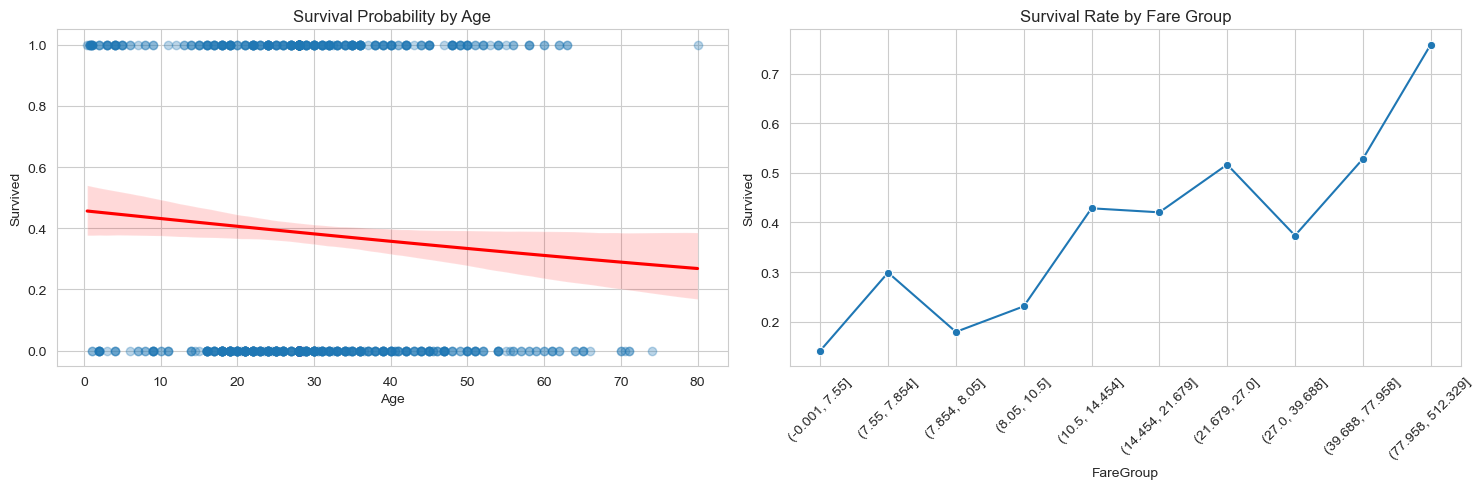

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Preprocess
df['Age'] = df['Age'].fillna(df['Age'].median())
df['FareGroup'] = pd.qcut(df['Fare'], 10)

# Plot trends
plt.figure(figsize=(15,5))

# Age trend
plt.subplot(1,2,1)
sns.regplot(
    x='Age', y='Survived', data=df, logistic=True, 
    scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'}
)
plt.title('Survival Probability by Age')

# Fare trend
plt.subplot(1,2,2)
fare_trend = df.groupby('FareGroup', observed=False)['Survived'].mean().reset_index()
fare_trend['FareGroup'] = fare_trend['FareGroup'].astype(str)  # Convert to string for plotting
sns.lineplot(x='FareGroup', y='Survived', data=fare_trend, marker='o')
plt.xticks(rotation=45)
plt.title('Survival Rate by Fare Group')

plt.tight_layout()
plt.show()


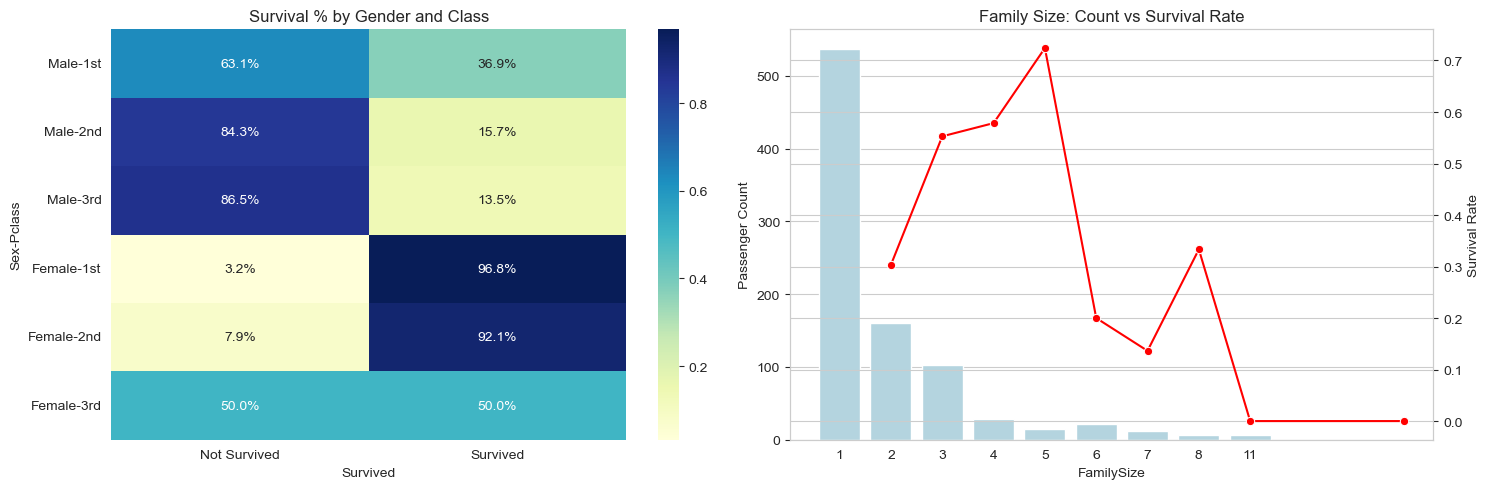

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Preprocess
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Plot patterns
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Gender-Class pattern
cross_tab = pd.crosstab([df['Sex'], df['Pclass']], df['Survived'], normalize='index')
sns.heatmap(cross_tab, annot=True, fmt='.1%', cmap='YlGnBu', ax=axes[0])
axes[0].set_title('Survival % by Gender and Class')
axes[0].set_xticklabels(['Not Survived', 'Survived'])
axes[0].set_yticklabels(['Male-1st', 'Male-2nd', 'Male-3rd',
                         'Female-1st', 'Female-2nd', 'Female-3rd'], rotation=0)

# Family Size pattern
family_pattern = df.groupby('FamilySize')['Survived'].agg(['mean', 'count']).reset_index()
ax1 = axes[1]
ax2 = ax1.twinx()
sns.barplot(x='FamilySize', y='count', data=family_pattern, color='lightblue', ax=ax1)
sns.lineplot(x='FamilySize', y='mean', data=family_pattern, color='red', marker='o', ax=ax2)
ax1.set_title('Family Size: Count vs Survival Rate')
ax1.set_ylabel('Passenger Count')
ax2.set_ylabel('Survival Rate')

plt.tight_layout()
plt.show()


# 14.TREND DETECTION

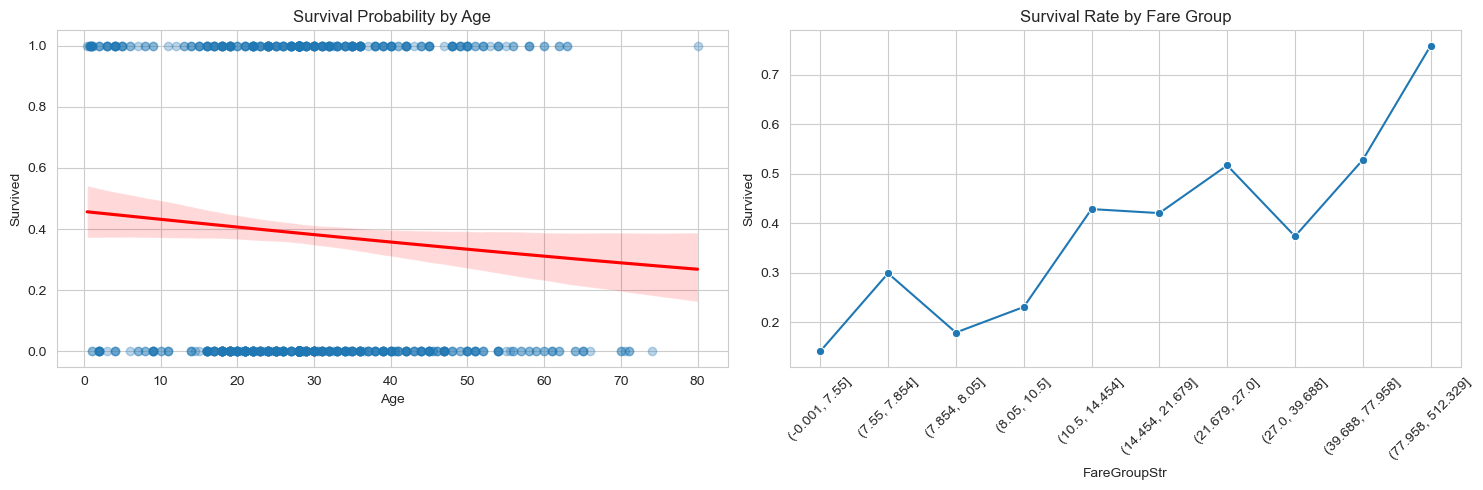

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Preprocess
df['Age'] = df['Age'].fillna(df['Age'].median())
df['FareGroup'] = pd.qcut(df['Fare'], 10)

# Prepare Fare trend data
fare_trend = df.groupby('FareGroup', observed=False)['Survived'].mean().reset_index()

# Extract lower bound of each interval for sorting
fare_trend['FareGroupStr'] = fare_trend['FareGroup'].astype(str)
fare_trend['LowerBound'] = fare_trend['FareGroup'].apply(lambda x: x.left)
fare_trend = fare_trend.sort_values('LowerBound')

# Plot
plt.figure(figsize=(15,5))

# Age trend
plt.subplot(1,2,1)
sns.regplot(x='Age', y='Survived', data=df, logistic=True, 
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Survival Probability by Age')

# Fare trend
plt.subplot(1,2,2)
sns.lineplot(x='FareGroupStr', y='Survived', data=fare_trend, marker='o')
plt.xticks(rotation=45)
plt.title('Survival Rate by Fare Group')

plt.tight_layout()
plt.show()


# 15.PATTERN DETECTION

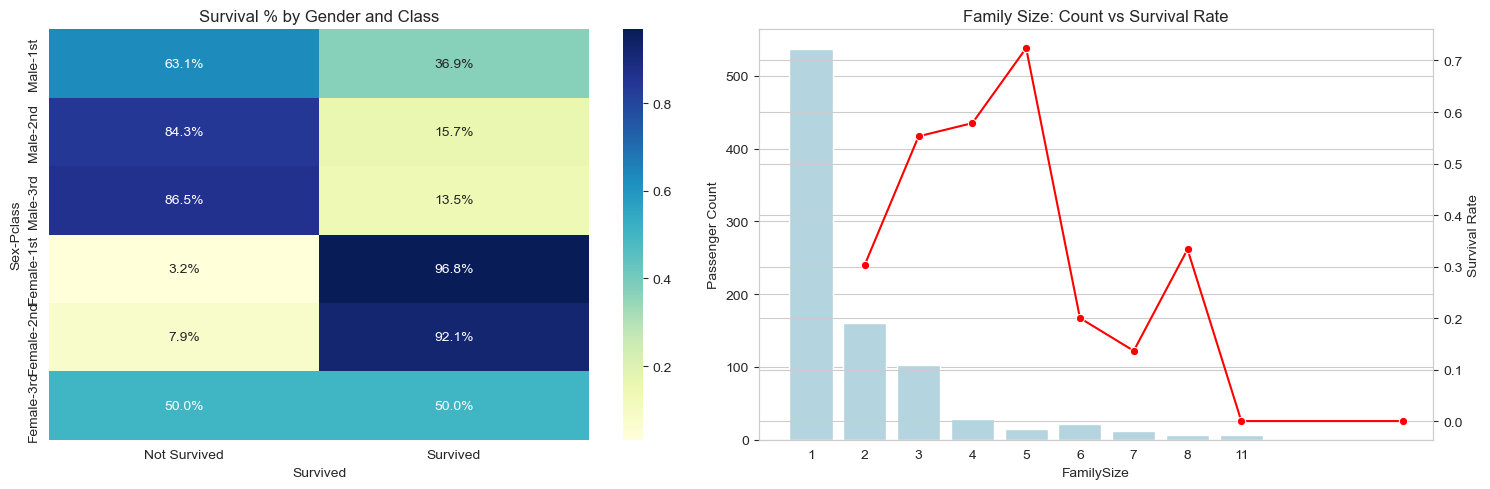

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Preprocess
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Plot patterns
plt.figure(figsize=(15, 5))

# Gender-Class pattern
plt.subplot(1, 2, 1)
heatmap_data = pd.crosstab([df['Sex'], df['Pclass']], df['Survived'], normalize='index')
sns.heatmap(heatmap_data, annot=True, fmt='.1%', cmap='YlGnBu')
plt.title('Survival % by Gender and Class')
plt.xticks([0.5, 1.5], ['Not Survived', 'Survived'])
plt.yticks([0.5, 1.5, 2.5, 3.5, 4.5, 5.5], 
           ['Male-1st', 'Male-2nd', 'Male-3rd', 'Female-1st', 'Female-2nd', 'Female-3rd'])

# Family Size pattern
plt.subplot(1, 2, 2)
family_pattern = df.groupby('FamilySize')['Survived'].agg(['mean', 'count'])

bar_ax = sns.barplot(x=family_pattern.index, y=family_pattern['count'], color='lightblue')
bar_ax.set_ylabel('Passenger Count')
line_ax = bar_ax.twinx()
sns.lineplot(x=family_pattern.index, y=family_pattern['mean'], color='red', marker='o', ax=line_ax)
line_ax.set_ylabel('Survival Rate')

plt.title('Family Size: Count vs Survival Rate')
plt.tight_layout()
plt.show()


# 16.ANOMALY DETECTION

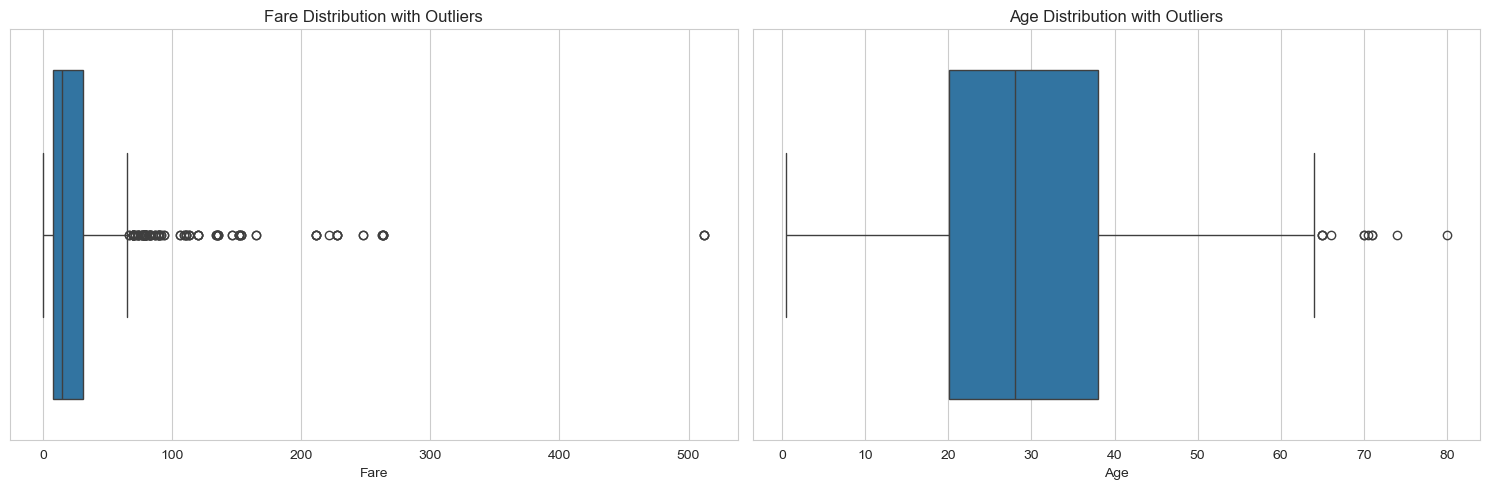


Top Fare Outliers:


,Name,Age,Fare,Pclass
27,"Fortune, Mr. Charles Alexander",19.0,263.0000,1
88,"Fortune, Miss. Mabel Helen",23.0,263.0000,1
118,"Baxter, Mr. Quigg Edmond",24.0,247.5208,1



Age Outliers:


,Name,Age,Sex,Pclass
78,"Caldwell, Master. Alden Gates",0.83,male,2
96,"Goldschmidt, Mr. George B",71.00,male,1
116,"Connors, Mr. Patrick",70.50,male,3



Large Families:


,Name,FamilySize,Ticket
7,"Palsson, Master. Gosta Leonard",5,349909
13,"Andersson, Mr. Anders Johan",7,347082
16,"Rice, Master. Eugene",6,382652


In [19]:
# TITANIC ANOMALY DETECTION: FARE, AGE, FAMILY SIZE

# Data handling and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display  # For displaying DataFrames in Jupyter

# Load data
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Feature engineering
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Detect anomalies using boxplots
plt.figure(figsize=(15,5))

# Fare anomalies
plt.subplot(1,2,1)
sns.boxplot(x=df['Fare'])
plt.title('Fare Distribution with Outliers')

# Age anomalies
plt.subplot(1,2,2)
sns.boxplot(x=df['Age'].dropna())
plt.title('Age Distribution with Outliers')

plt.tight_layout()
plt.show()

# Identify anomaly cases
fare_outliers = df[df['Fare'] > 200][['Name','Age','Fare','Pclass']]
age_outliers = df[(df['Age'] < 1) | (df['Age'] > 70)][['Name','Age','Sex','Pclass']]
family_outliers = df[df['FamilySize'] > 4][['Name','FamilySize','Ticket']]

# Display results
print("\nTop Fare Outliers:")
display(fare_outliers.head(3))

print("\nAge Outliers:")
display(age_outliers.head(3))

print("\nLarge Families:")
if not family_outliers.empty:
    display(family_outliers.head(3))
else:
    print("No large families (FamilySize > 4) found.")


#  17.HYPOTHESES TESTING & ASSUMPTION VALIDATION

=== HYPOTHESIS 1: GENDER SURVIVAL DIFFERENCE ===
Chi-square test: χ²=260.72, p=0.0000
Z-test: z=16.22, p=0.0000

=== HYPOTHESIS 2: CLASS SURVIVAL DIFFERENCE ===
Chi-square test: χ²=102.89, p=0.0000
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     1      2  -0.1568 0.002 -0.2647 -0.0489   True
     1      3  -0.3873   0.0 -0.4751 -0.2994   True
     2      3  -0.2305   0.0 -0.3234 -0.1375   True
---------------------------------------------------

=== ASSUMPTION 1: AGE-GENDER INTERACTION ===
                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     128.3
Date:                Sun, 06 Apr 2025   Prob (F-statistic):           4.77e-

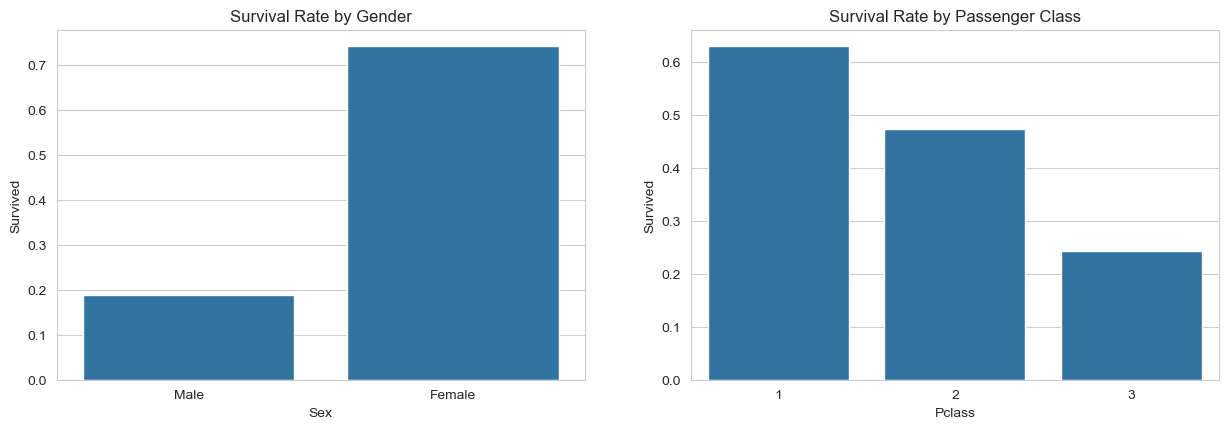

<Figure size 600x400 with 0 Axes>

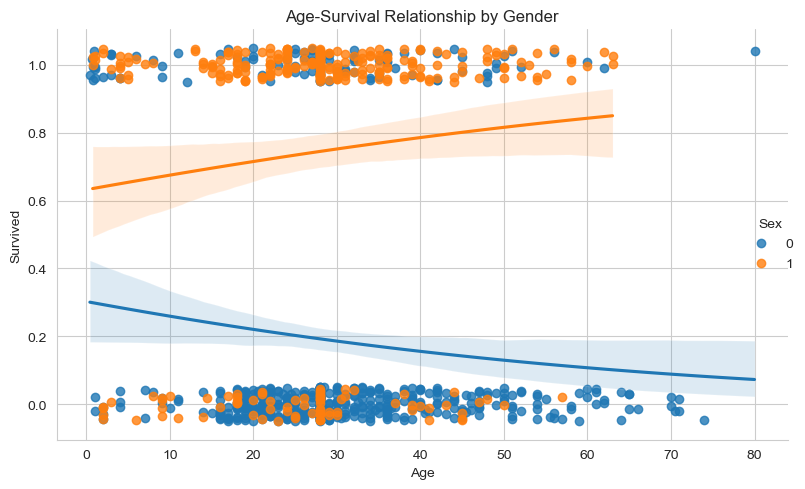

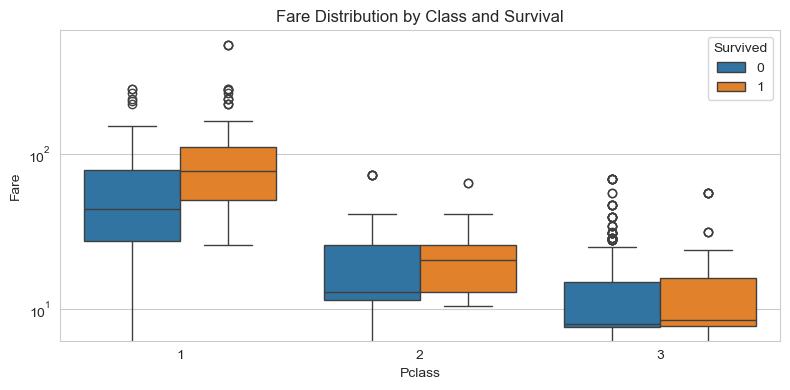

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

# Load and prepare data
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Age'] = df['Age'].fillna(df['Age'].median())

# Set visual style
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))

# ========== HYPOTHESIS TESTING ==========

# Hypothesis 1: Women had higher survival rates than men
print("=== HYPOTHESIS 1: GENDER SURVIVAL DIFFERENCE ===")
gender_table = pd.crosstab(df['Sex'], df['Survived'])
chi2, p, _, _ = stats.chi2_contingency(gender_table)
print(f"Chi-square test: χ²={chi2:.2f}, p={p:.4f}")

# Z-test for proportions
female_survived = df[df['Sex'] == 1]['Survived'].sum()
female_total = (df['Sex'] == 1).sum()
male_survived = df[df['Sex'] == 0]['Survived'].sum()
male_total = (df['Sex'] == 0).sum()

z_stat, p_val = proportions_ztest(
    [female_survived, male_survived],
    [female_total, male_total]
)
print(f"Z-test: z={z_stat:.2f}, p={p_val:.4f}")

# Visualization
plt.subplot(2, 2, 1)
sns.barplot(x='Sex', y='Survived', data=df, errorbar=None)
plt.xticks([0, 1], ['Male', 'Female'])
plt.title('Survival Rate by Gender')

# Hypothesis 2: Higher class passengers had better survival
print("\n=== HYPOTHESIS 2: CLASS SURVIVAL DIFFERENCE ===")
class_table = pd.crosstab(df['Pclass'], df['Survived'])
chi2, p, _, _ = stats.chi2_contingency(class_table)
print(f"Chi-square test: χ²={chi2:.2f}, p={p:.4f}")

# Post-hoc pairwise comparisons (optional if needed)
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(
    endog=df['Survived'],
    groups=df['Pclass'],
    alpha=0.05
)
print(tukey)

# Visualization
plt.subplot(2, 2, 2)
sns.barplot(x='Pclass', y='Survived', data=df, errorbar=None)
plt.title('Survival Rate by Passenger Class')

# ========== ASSUMPTION VALIDATION ==========

# Assumption 1: Age affects survival differently by gender
print("\n=== ASSUMPTION 1: AGE-GENDER INTERACTION ===")
from statsmodels.formula.api import ols
model = ols('Survived ~ Age * Sex', data=df).fit()
print(model.summary())

# Visualization (lmplot is separate from subplot)
plt.figure(figsize=(6, 4))
sns.lmplot(x='Age', y='Survived', hue='Sex', data=df, 
           logistic=True, y_jitter=.05, aspect=1.5)
plt.title('Age-Survival Relationship by Gender')
plt.tight_layout()

# Assumption 2: Fare correlates with survival after controlling for class
print("\n=== ASSUMPTION 2: FARE + CLASS LOGISTIC REGRESSION ===")
import statsmodels.api as sm

X = df[['Fare', 'Pclass']]
X = sm.add_constant(X)
y = df['Survived']

logit_model = sm.Logit(y, X).fit()
print(logit_model.summary())

# Visualization
plt.figure(figsize=(8, 4))
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=df)
plt.yscale('log')
plt.title('Fare Distribution by Class and Survival')
plt.tight_layout()

# ========== ADDITIONAL VALIDATION ==========

# Normality check for continuous variables
print("\n=== NORMALITY TESTS ===")
for col in ['Age', 'Fare']:
    stat, p = stats.shapiro(df[col].dropna())
    print(f"{col}: W={stat:.3f}, p={p:.4f}")

# Homogeneity of variance check
print("\n=== VARIANCE HOMOGENEITY ===")
class_groups = [df[df['Pclass'] == i]['Fare'] for i in [1, 2, 3]]
levene = stats.levene(*class_groups)
print(f"Levene's test: W={levene.statistic:.2f}, p={levene.pvalue:.4f}")

plt.show()


# 18.SURVIVAL PREDICTION MODEL
# Problem: Predict passenger survival based on demographics and ticket features
# Solution: Build a machine learning classifier

Accuracy: 81.56%


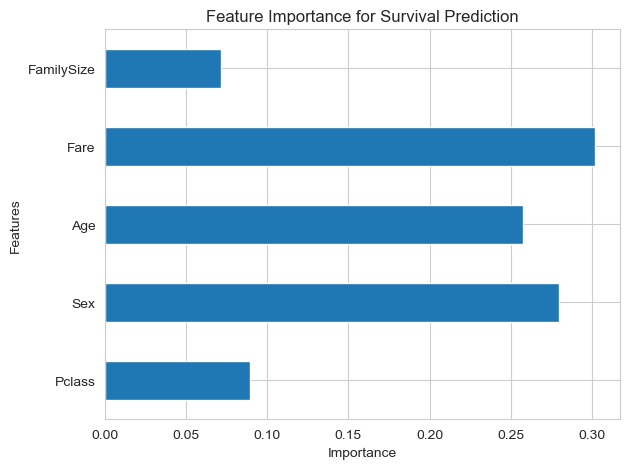

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load Titanic dataset (if not already loaded)
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Preprocessing
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())  # Just in case
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Feature matrix and target variable
X = df[['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize']]
y = df['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Build and train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate model
print(f"Accuracy: {model.score(X_test, y_test):.2%}")

# Feature importance visualization
pd.Series(model.feature_importances_, index=X.columns).plot.barh()
plt.title('Feature Importance for Survival Prediction')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


#  19.OPTIMAL LIFEBOAT ALLOCATION
# Problem: Determine priority groups for limited lifeboat seats
# Solution: Survival probability analysis by demographic groups




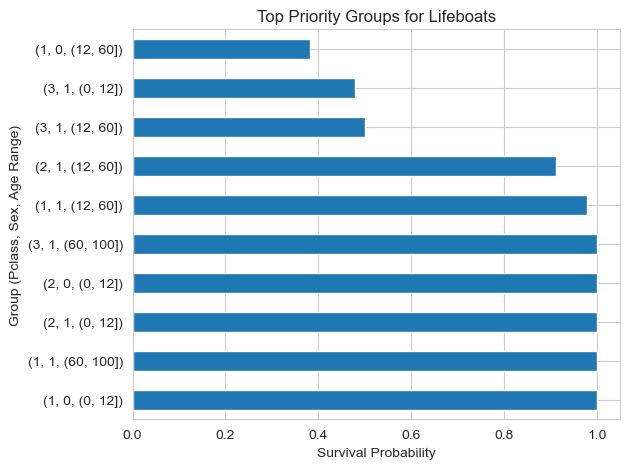

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Example: Ensure 'df' is loaded and preprocessed
# df = pd.read_csv('titanic.csv') # Uncomment this if you haven't loaded the dataset

# Optional: Fill missing Age values if not already handled
df['Age'] = df['Age'].fillna(df['Age'].median())

# Group by class, sex, and age group, calculate survival probability
priority_groups = df.groupby(
    ['Pclass', 'Sex', pd.cut(df['Age'], [0, 12, 60, 100])],
    observed=True  # Silences the FutureWarning
)['Survived'].mean()

# Sort and plot the top 10 groups
priority_groups.sort_values(ascending=False).head(10).plot.barh()
plt.title('Top Priority Groups for Lifeboats')
plt.xlabel('Survival Probability')
plt.ylabel('Group (Pclass, Sex, Age Range)')
plt.tight_layout()
plt.show()


# 20.Ticket Pricing Strategy
## Problem: Identify fare anomalies and optimal pricing tiers
## Solution: Fare distribution analysis by class



In [23]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Pclass', y='Fare', data=df[df['Fare'] < 200]) # Exclude extreme outliers
plt.title('Fare Distribution by Class')
plt.ylabel('Fare (£)')

# Identify underpriced tickets
underpriced = df[(df['Pclass'] == 1) & (df['Fare'] < df[df['Pclass'] == 1]['Fare'].quantile(0.25))]
print(f"\nPotential underpriced 1st class tickets: {len(underpriced)}")


Potential underpriced 1st class tickets: 54


#  21.CREW SURVIVAL ANALYSIS
# Problem: Compare crew vs passenger survival rates
# Solution: Identify crew through zero-fare tickets

In [24]:
crew = df[df['Fare'] == 0]
passengers = df[df['Fare'] > 0]

print(f"Crew survival rate: {crew['Survived'].mean():.1%}")
print(f"Passenger survival rate: {passengers['Survived'].mean():.1%}")

sns.barplot(x=['Crew', 'Passengers'], y=[crew['Survived'].mean(), passengers['Survived'].mean()])
plt.title('Survival Rate: Crew vs Passengers')
plt.ylabel('Survival Probability')

Crew survival rate: 6.7%
Passenger survival rate: 38.9%


Text(86.47222222222221, 0.5, 'Survival Probability')

In [32]:
# Create new features
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 
                                  'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Family features
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# Cabin features
df['HasCabin'] = (~df['Cabin'].isna()).astype(int)

# Age bins
df['AgeBin'] = pd.cut(df['Age'], bins=[0,12,20,40,120], labels=['Child','Teen','Adult','Elder'])


In [3]:
!pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
  Using cached xgboost-3.0.0-py3-none-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 1.5 MB/s eta 0:01:39
   ---------------------------------------- 0.8/150.0 MB 1.6 MB/s eta 0:01:34
   ---------------------------------------- 1.0/150.0 MB 1.7 MB/s eta 0:01:26
   ---------------------------------------- 1.6/150.0 MB 1.7 MB/s eta 0:01:27
   ---------------------------------------- 1.8/150.0 MB 1.7 MB/s eta 0:01:29
    --------------------------------------- 2.4/150.0 MB 1.8 MB/s eta 0:01:22
    --------------------------------------- 3.1/150.0 MB 2.1 MB/s eta 0:01:10
    --------------------------------------- 3.4/150.0 MB 2.2 MB/s eta 0:01:08
   - -------------------------------------- 3.9/150.0 MB 2.0 MB/s eta 0:01:13
   - ---

In [4]:
from xgboost import XGBClassifier


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# ==== Load your dataset ====
# df = pd.read_csv('your_dataset.csv')  # Replace with your actual data path

# ==== Feature Engineering ====

# Title extraction from Name
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 
                                  'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Family features
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# Cabin feature
df['HasCabin'] = (~df['Cabin'].isna()).astype(int)

# Age binning
df['AgeBin'] = pd.cut(df['Age'], bins=[0,12,20,40,120], labels=['Child','Teen','Adult','Elder'])

# Fill missing values
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)

# Encode categorical variables
categorical = ['Sex', 'Embarked', 'Title', 'AgeBin']
for col in categorical:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Drop columns not useful
df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)

# ==== Train/Test Split ====
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ==== Hyperparameter Tuning ====
param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'n_estimators': [100, 200]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
grid = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# ==== Evaluation ====
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print(f"\nBest Cross-Validation Accuracy: {grid.best_score_:.2%}")
print(f"Best Parameters: {grid.best_params_}")
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_pred))


NameError: name 'df' is not defined